In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r'D:\ev-charging-stations-india.csv')

In [3]:
# Data Preprocessing
# Handling missing values
df = df.dropna()

In [4]:
# Convert latitude and longitude to numeric
df['latitude'] = pd.to_numeric(df['lattitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['type'] = pd.to_numeric(df['type'], errors='coerce')

In [5]:
# Drop any rows with NaN after conversion
df = df.dropna()

In [6]:
# Selecting features for clustering
features = df[['latitude', 'longitude', 'type']]

In [7]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# --- Elbow Method to Determine Optimal K ---
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


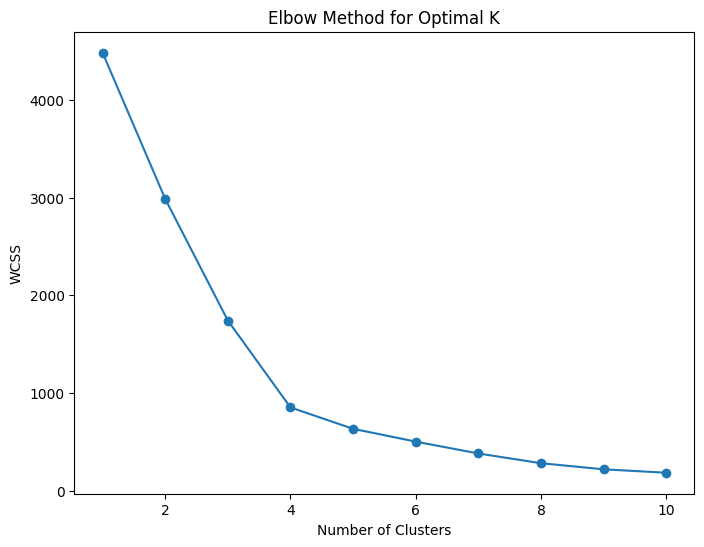

In [18]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


K-Means Clustering:
Silhouette Score for K-Means: 0.4079459288926


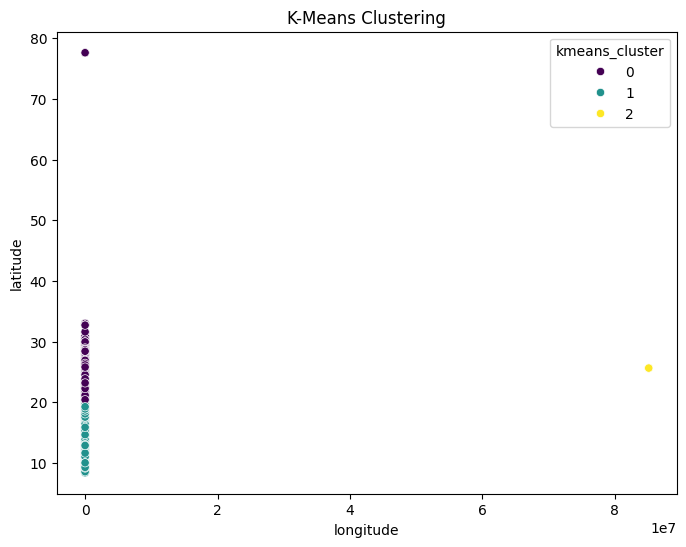

In [19]:
# --- K-Means Clustering ---
print("\nK-Means Clustering:")
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(scaled_features)
silhouette_avg = silhouette_score(scaled_features, df['kmeans_cluster'])
print(f'Silhouette Score for K-Means: {silhouette_avg}')

# Visualize K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='kmeans_cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()


DBSCAN Clustering:


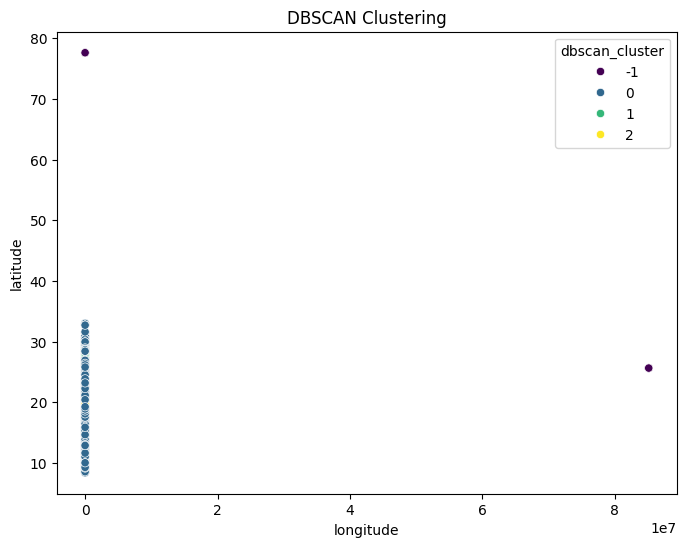

In [20]:
# --- DBSCAN Clustering ---
print("\nDBSCAN Clustering:")
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

# Visualize DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='dbscan_cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


PCA for Dimensionality Reduction:
Silhouette Score for PCA + K-Means: 0.6223491791300747


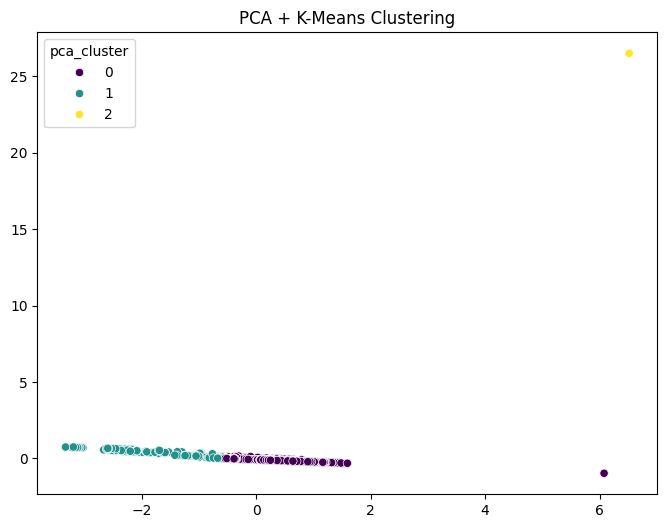

In [21]:
# --- PCA for Dimensionality Reduction ---
print("\nPCA for Dimensionality Reduction:")
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df['pca_cluster'] = kmeans_pca.fit_predict(pca_features)
silhouette_pca = silhouette_score(pca_features, df['pca_cluster'])
print(f'Silhouette Score for PCA + K-Means: {silhouette_pca}')

# Visualize PCA Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue='pca_cluster', data=df, palette='viridis')
plt.title('PCA + K-Means Clustering')
plt.show()


Hierarchical Clustering:


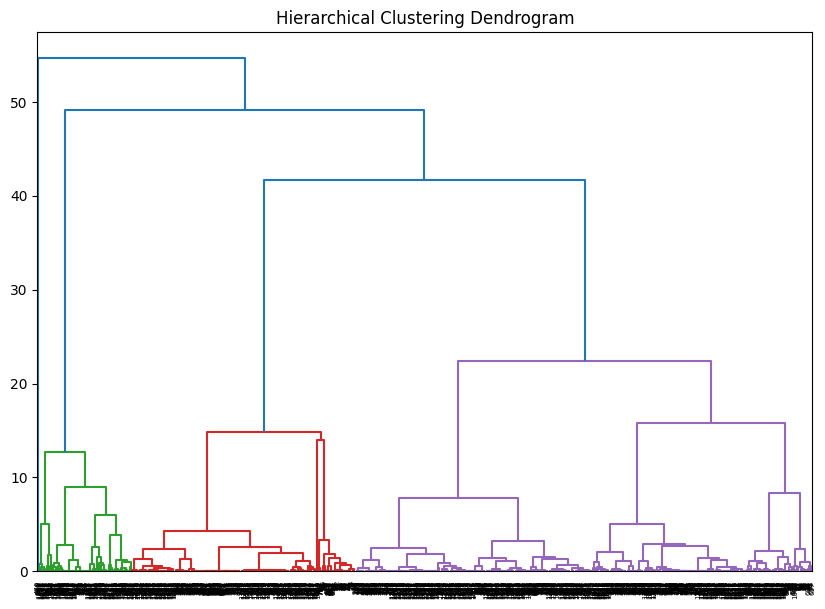

In [22]:
# --- Hierarchical Clustering ---
print("\nHierarchical Clustering:")
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

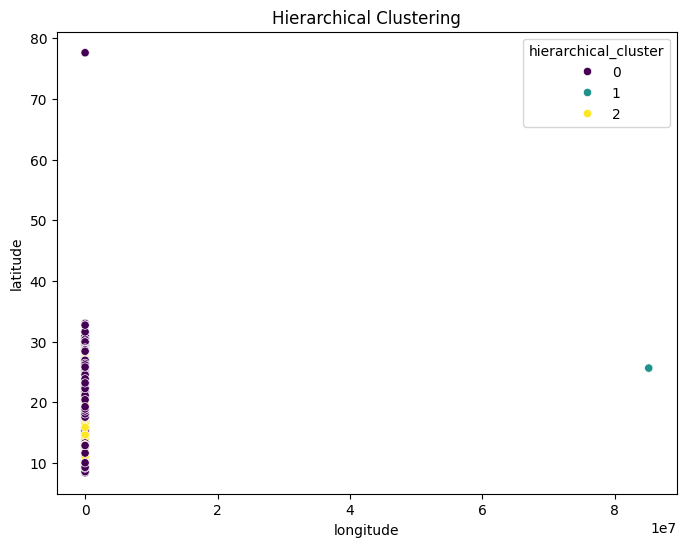

In [23]:
# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['hierarchical_cluster'] = hierarchical.fit_predict(scaled_features)

# Visualize Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='hierarchical_cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

In [24]:
# Summary of cluster assignments
print("\nCluster Assignments:")
print(df[['name', 'state', 'city', 'kmeans_cluster', 'dbscan_cluster', 'pca_cluster', 'hierarchical_cluster']].head())


Cluster Assignments:
                                                name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

   kmeans_cluster  dbscan_cluster  pca_cluster  hierarchical_cluster  
0               0               0            0                     0  
1               0               0            0                     0  
2               0               0            0                     0  
3               0               0            0                     0  
4               0               0            0                     0  
